<a href="https://colab.research.google.com/github/Prattoypaul/myml/blob/main/nuralNetwork_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
(xtrain,ytrain) , (xtest,ytest)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(xtest)

10000

In [5]:
len(xtrain)

60000

In [6]:
xtrain=xtrain/255
xtest=xtest/255

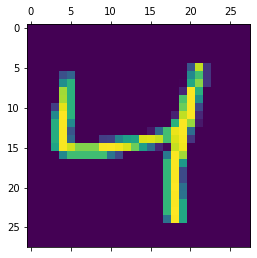

In [7]:
plt.matshow(xtrain[2])

In [8]:
xtrain[3].shape

(28, 28)

In [9]:
xtrain_flt=xtrain.reshape(len(xtrain),28*28)

In [10]:
xtest_flt=xtest.reshape(len(xtest),28*28)

In [11]:
xtrain_flt.shape

(60000, 784)

In [12]:
xtrain_flt[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7260 - accuracy: 0.8103
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3137 - accuracy: 0.9120
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2826 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2753 - accuracy: 0.9252
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9265
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2558 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2538 - accuracy: 0.9269
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2524 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.248

In [15]:
model.evaluate(xtest_flt,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9264


[0.26470616459846497, 0.9264000058174133]

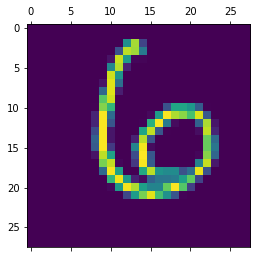

In [16]:
plt.matshow(xtest[100])

In [17]:
y_pred=model.predict(xtest_flt)

In [20]:
y_pred[0]

array([3.9545000e-03, 2.1075842e-08, 1.1872858e-02, 9.7848463e-01,
       1.6951859e-03, 1.5122092e-01, 3.4934526e-08, 9.9985933e-01,
       1.0125461e-01, 7.2428423e-01], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

In [29]:
y_pred_leb=[tf.argmax(i) for i in y_pred]

In [30]:
y_pred_leb[:5]

[<tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>]

In [31]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred_leb)

In [32]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,    7,    2,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,   10,  920,   19,    8,    3,   12,   10,   39,    4],
       [   3,    0,   15,  929,    1,   17,    4,    9,   23,    9],
       [   1,    1,    4,    2,  916,    0,   10,    4,   10,   34],
       [   8,    3,    1,   40,    9,  767,   17,    7,   33,    7],
       [  12,    3,    6,    1,    7,    9,  917,    1,    2,    0],
       [   1,    7,   21,    9,    9,    1,    0,  939,    3,   38],
       [   5,   10,    5,   23,    9,   19,    9,   10,  873,   11],
       [   9,    8,    1,   10,   26,    5,    0,   11,    8,  931]],
      dtype=int32)>

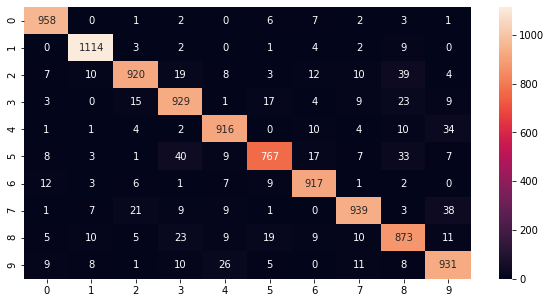

In [34]:
plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True,fmt='d')

In [37]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.fit(xtrain_flt,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4754 - accuracy: 0.8607
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0268 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [39]:
model.evaluate(xtest_flt,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9769


[0.08099573850631714, 0.9768999814987183]

In [40]:
y_predict=model.predict(xtest_flt)

In [42]:
y_pl=[tf.argmax(i) for i in y_predict]

In [44]:
con=tf.math.confusion_matrix(labels=ytest,predictions=y_pl)

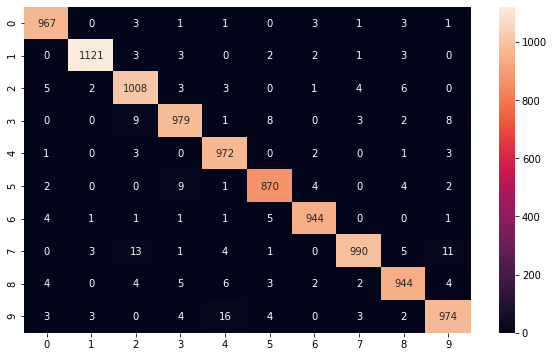

In [46]:
plt.figure(figsize=(10,6))
sb.heatmap(con,annot=True,fmt='d')